![](lista_2_circuito.png)

In [2]:
import control
import numpy as np

import sys
sys.path.append('../')
from control_utils import *
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex

In [2]:
T = 0.1

In [3]:
G1s = control.tf([6], [1, 6])
G1z = control.c2d(G1s, Ts=T, method='zoh')

G2s = control.tf([1], [1, 0]) 
G2z = control.c2d(G2s, Ts=T, method='zoh')

Hs = control.tf([2], [0.5, 3])
Hz = control.c2d(Hs, Ts=T, method='zoh')

FTMF = G2z/(1+G2z*Hz) 
FTMF = FTMF.minreal()
print('Poles before gain:', FTMF.pole())

Poles before gain: [0.9186747  0.63013693]


In [4]:
k = gain_for_pole(FTMA = G2z*Hz, z1 = 0.774 + 0.36j)
print('k =', k)

G2z = control.c2d(G2s, Ts=T, method='zoh')*k
FTMF = G2z/(1+G2z*Hz) 
FTMF = FTMF.minreal()
print(FTMF)
print('Poles after gain:', FTMF.pole())

k = 6.000580506465021

  0.6001 z - 0.3293
----------------------
z^2 - 1.549 z + 0.7293

dt = 0.1

Poles after gain: [0.77440582+0.3600001j 0.77440582-0.3600001j]


{'Mp': 32.58007897704238,
 'tp': 0.8,
 'ts5': 1.7000000000000002,
 'ts2': 2.4000000000000004,
 'tr': 0.4,
 'td': 0.4,
 'ess': -0.4999998719343275,
 'final_value_step': 1.4999999999999891}

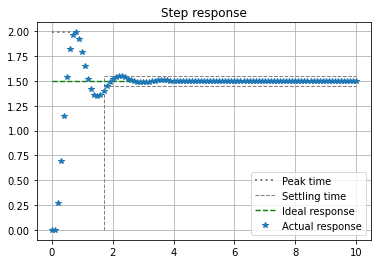

In [5]:
FTMF_all = G1z*FTMF
step_info(FTMF_all, tfinal=10)

(-0+0j) * 0j
(-0.7499999999999996+0.4699877488511102j) * (0.7744058180470196+0.36000009974373814j)
(-0.7499999999999996-0.4699877488511102j) * (0.7744058180470196-0.36000009974373814j)
(1.5000000000000004+0j) * (0.9999999999999991+0j)


$$y(n) = -0.7500*0.7744^n -0.7500*0.7744^n +1.5000*1.0000^n$$

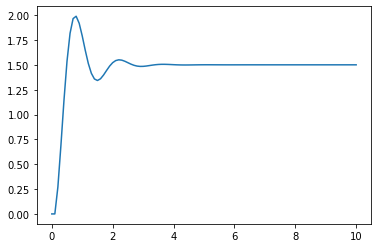

In [7]:
impulse_z = control.tf([1, 0], [1, -1], T)
show_formatted(tf_inverse_transform_format((FTMF_all*impulse_z).minreal()))


t_final = 100
k_vec = np.linspace(0, t_final, t_final+1, dtype=int)
y = np.empty(t_final+1)

y = (-0.7499999999999996+0.4699877488511102j)*(0.7744058180470196+0.36000009974373814j)**k_vec + \
(-0.7499999999999996-0.4699877488511102j)*(0.7744058180470196-0.36000009974373814j)**k_vec + \
(1.5000000000000004+0j)*(0.9999999999999991+0j)**k_vec
assert (np.imag(y)>0.0001).sum() == 0
y = np.real(y)
plt.plot(k_vec*T, y)

# outro problema similar

In [8]:
G

TransferFunction(array([16]), array([ 1. ,  4.8, 16. ]))


       16
----------------
s^2 + 4.8 s + 16

FINAL VALUE OF Gz =  0.9999999999999976


{'Mp': 9.477231373245008,
 'tp': 0.9815,
 'ts5': 1.307,
 'ts2': 1.4855,
 'tr': 0.4635,
 'td': 0.3395,
 'ess': -7.210767607235269e-06,
 'final_value_step_simulated': 1.0000072107676072,
 'final_value_step_theoretical': 0.7339449541284404}

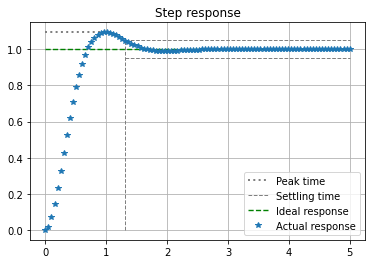

In [10]:
# Parâmetros dados
T = 0.2
Gs = system_from_parameters(zeta=0.6, wn=4)
Gz = control.c2d(Gs, T)
print(Gs)
print('FINAL VALUE OF Gz = ', final_value(Gz))
step_info(Gs, tfinal=5)

In [4]:
final_value(desired_G)

0.7339449541284404